In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import tree
from xgboost import XGBRegressor
import plotly.express as px
import graphviz

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

# Reading and analysis of dataframe

In [4]:
tr = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
tr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
tr.shape

(1460, 81)

In [6]:
tr.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Imputing Null Values

In [8]:
tr_null_pc = tr.isnull().sum()/len(tr)*100
tr_null_pc = tr_null_pc[tr_null_pc>0]
tr_null_pc

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [9]:
# drop irrelevant variable
tr = tr.drop(columns=['Id'])

In [10]:
tr = tr.dropna(subset=['Electrical','GarageYrBlt'])

In [11]:
# here NA is No Fireplace
tr.FireplaceQu = tr.FireplaceQu.fillna('No Fireplace')

# here NA is No alley access 
tr.Alley = tr.Alley.fillna('No alley access')

# here NA is No pool
tr.PoolQC = tr.PoolQC.fillna('No Pool')

# here NA is No fence
tr.Fence = tr.Fence.fillna('No Fence')


tr.MasVnrType = tr.MasVnrType.fillna('None')


tr.MiscFeature = tr.MiscFeature.fillna('None')

# here NA is No garage
tr.GarageQual = tr.GarageQual.fillna('No Garage')


tr.GarageFinish = tr.GarageFinish.fillna('No Garage')


tr.BsmtQual = tr.BsmtQual.fillna('No Basement')


tr.BsmtExposure = tr.BsmtExposure.fillna('No Basement')


tr.BsmtCond = tr.BsmtCond.fillna('No Basement')


tr.BsmtFinType1 = tr.BsmtFinType1.fillna('No Basement')


tr.BsmtFinType2 = tr.BsmtFinType2.fillna('No Basement')

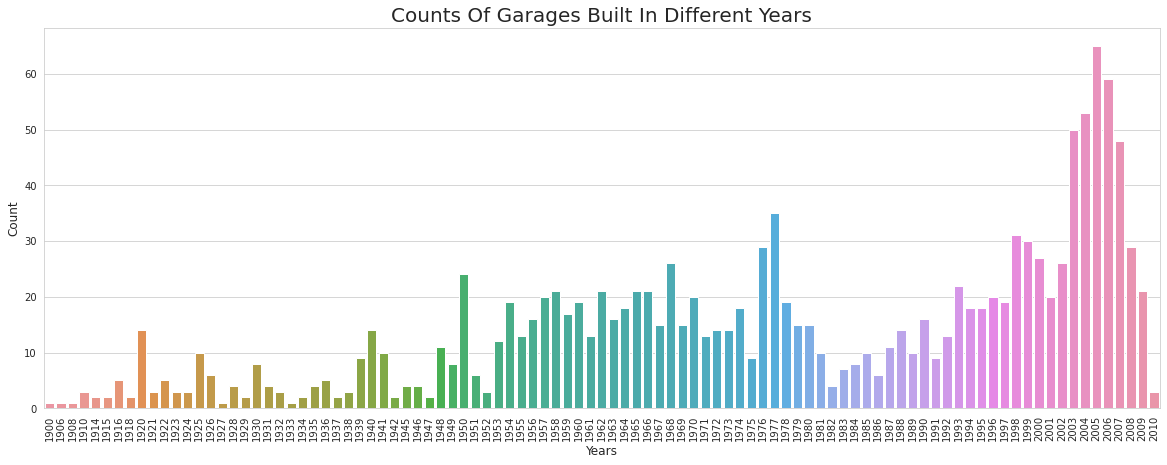

In [12]:
# Changing years from float to integer for better readability of graph
tr.GarageYrBlt = tr.GarageYrBlt.astype('int')

# Plot
plt.figure(figsize=[20,7])
sns.countplot(tr.GarageYrBlt)
plt.title('Counts Of Garages Built In Different Years', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

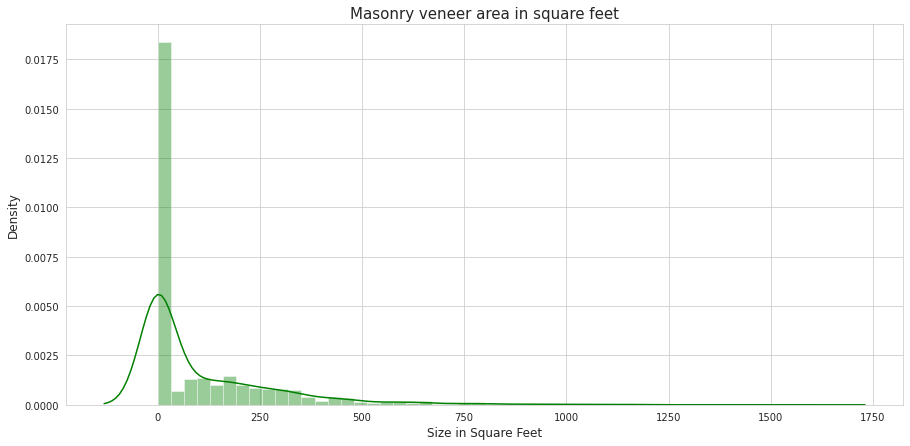

In [13]:

plt.figure(figsize=[15,7])
sns.distplot(tr.MasVnrArea, color='g')
plt.title('Masonry veneer area in square feet', fontsize=15)
plt.xlabel('Size in Square Feet', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

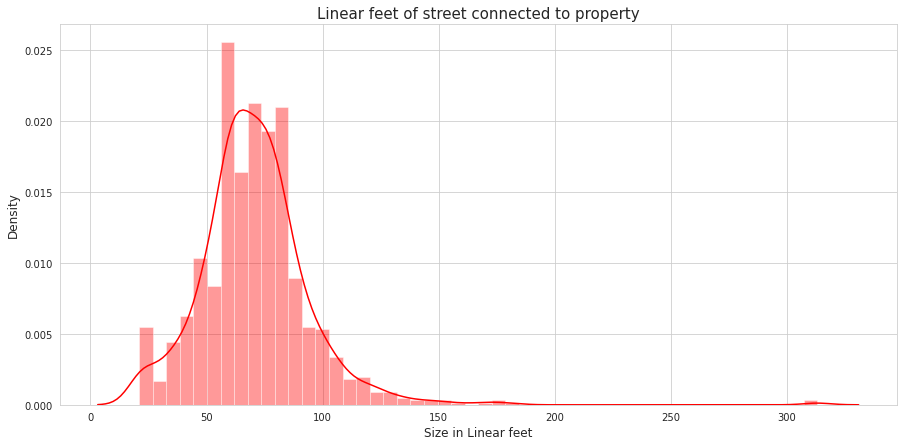

In [14]:

plt.figure(figsize=[15,7])
sns.distplot(tr.LotFrontage, color='r')
plt.title('Linear feet of street connected to property', fontsize=15)
plt.xlabel('Size in Linear feet', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [15]:
tr_null_pc = tr.isnull().sum()/len(tr)*100
tr_null_pc = tr_null_pc[tr_null_pc>0]
tr_null_pc

# Will do mathemetical imputations after train test split below

LotFrontage    18.287373
MasVnrArea      0.580552
dtype: float64

In [16]:
te = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
te.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [17]:
te.shape

(1459, 80)

In [18]:
te_null_pc = te.isnull().sum()
te_null_pc[te_null_pc>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [19]:

te_bsmt = te.filter(regex='Bsmt')
te_bsmt_num = te_bsmt.select_dtypes(exclude='object')
te_bsmt_cat = te_bsmt.select_dtypes(include='object')

#te.loc[te.TotalBsmtSF == 0.0, te_bsmt_cat] = 'No Basement'

te[te_bsmt_cat.columns] = te[te_bsmt_cat.columns].fillna('No Basement')
te[te_bsmt_num.columns] = te[te_bsmt_num.columns].fillna(0)

In [20]:

te_gar = te.filter(regex='Garage')
te_gar_num = te_gar.select_dtypes(exclude='object')
te_gar_cat = te_gar.select_dtypes(include='object')

te[te_gar_cat.columns] = te[te_gar_cat.columns].fillna('No Garage')
te[te_gar_num.columns] = te[te_gar_num.columns].fillna(0)

In [21]:
# here NA is No Fireplace
te.FireplaceQu = te.FireplaceQu.fillna('No Fireplace')

# here NA is No alley access 
te.Alley = te.Alley.fillna('No alley access')

# here NA is No pool
te.PoolQC = te.PoolQC.fillna('No Pool')

# here NA is No fence
te.Fence = te.Fence.fillna('No Fence')

# No Masonry veneer type
te.MasVnrType = te.MasVnrType.fillna('None')

# No Masonry veneer type so area would be 0
te.MasVnrArea = te.MasVnrArea.fillna(0)


te.MiscFeature = te.MiscFeature.fillna('None')

In [22]:
# we will leave the remaining null values from non-specified/continuous variables as is, to prevent false assumptions
te_null_pc = te.isnull().sum()
te_null_pc[te_null_pc>0]

MSZoning         4
LotFrontage    227
Utilities        2
Exterior1st      1
Exterior2nd      1
KitchenQual      1
Functional       2
SaleType         1
dtype: int64

# Exploratory Data Analysis

In [23]:
tr.MoSold = tr.MoSold.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [24]:
tr_num = tr.select_dtypes(exclude='object').copy()
tr_obj = tr.select_dtypes(include='object').copy()
te_obj = te.select_dtypes(include='object').copy()

In [25]:
tr_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,0,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,2008,250000


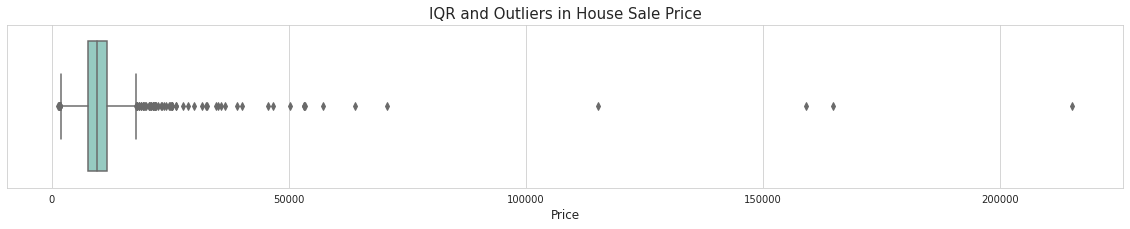

In [26]:

plt.figure(figsize=(20, 3))
sns.boxplot(tr.LotArea, palette="Set3")
plt.title('IQR and Outliers in House Sale Price', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.show()

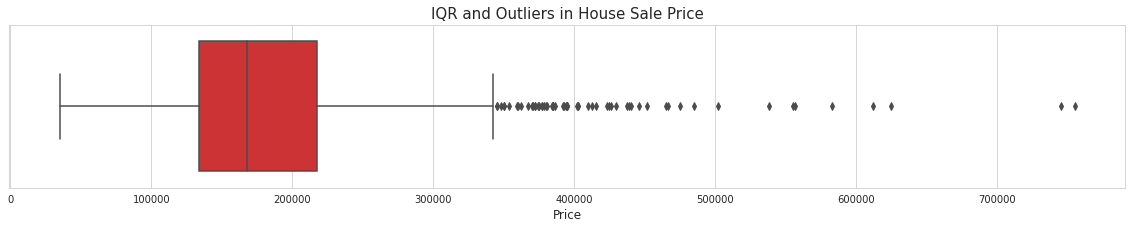

In [27]:

plt.figure(figsize=(20, 3))
sns.boxplot(tr.SalePrice, palette="Set1")
plt.title('IQR and Outliers in House Sale Price', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.show()

In [28]:
tr.SalePrice.quantile([0.25,0.5,0.75,0.9,0.95,0.99])

0.25    134000.00
0.50    167700.00
0.75    217875.00
0.90    281725.70
0.95    335000.00
0.99    447569.47
Name: SalePrice, dtype: float64

It can be observed from above that outliers for sale price are above 95th percentile or 335000 and ones above ~447500 are extreme outliers.

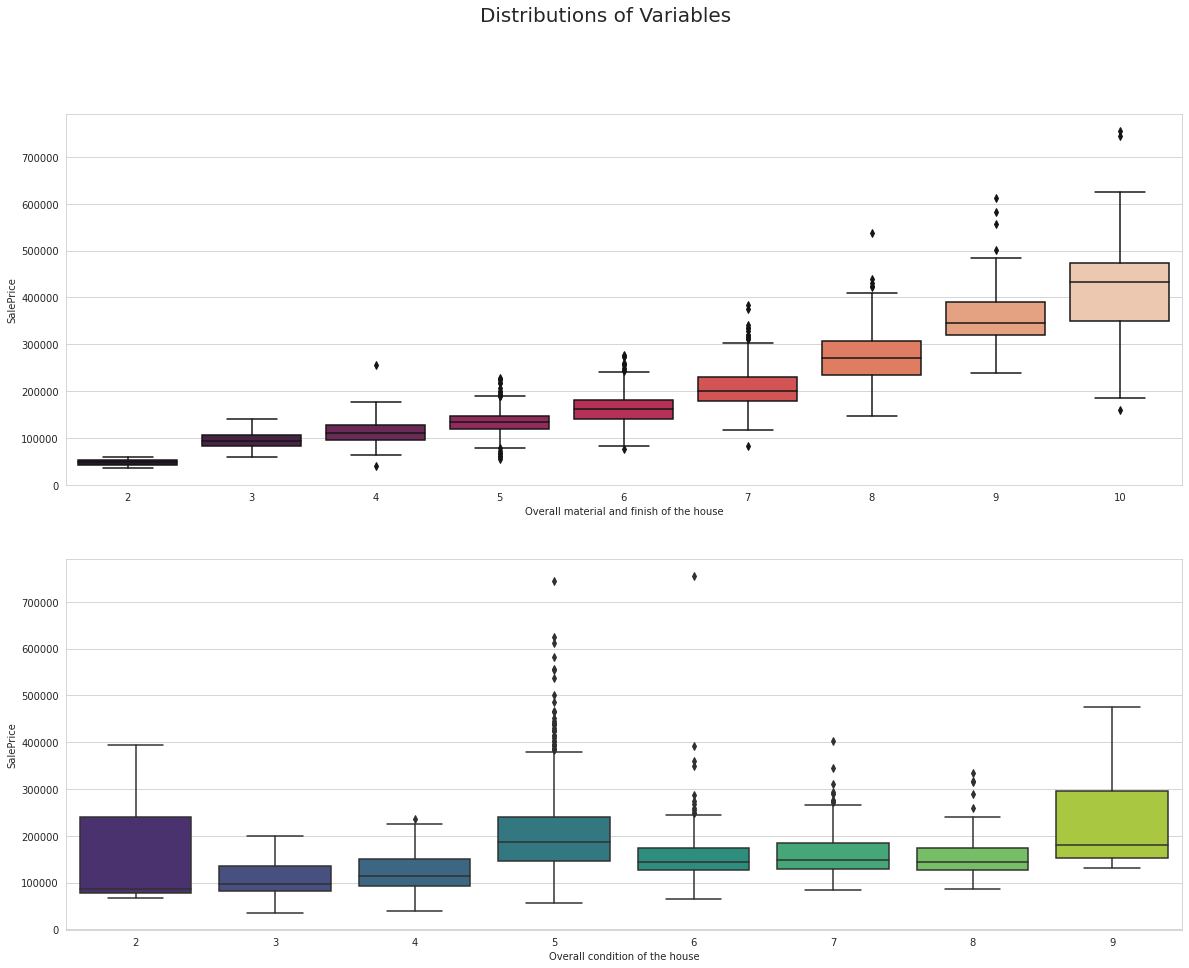

In [29]:

plt.figure(figsize=(20, 15))
plt.subplot(2,1,1)
sns.boxplot(x=tr.OverallQual, y=tr.SalePrice, palette="rocket").set(xlabel='Overall material and finish of the house')
plt.subplot(2,1,2)
sns.boxplot(x=tr.OverallCond, y=tr.SalePrice, palette='viridis').set(xlabel='Overall condition of the house')
plt.suptitle('Distributions of Variables',fontsize=20)
plt.show()

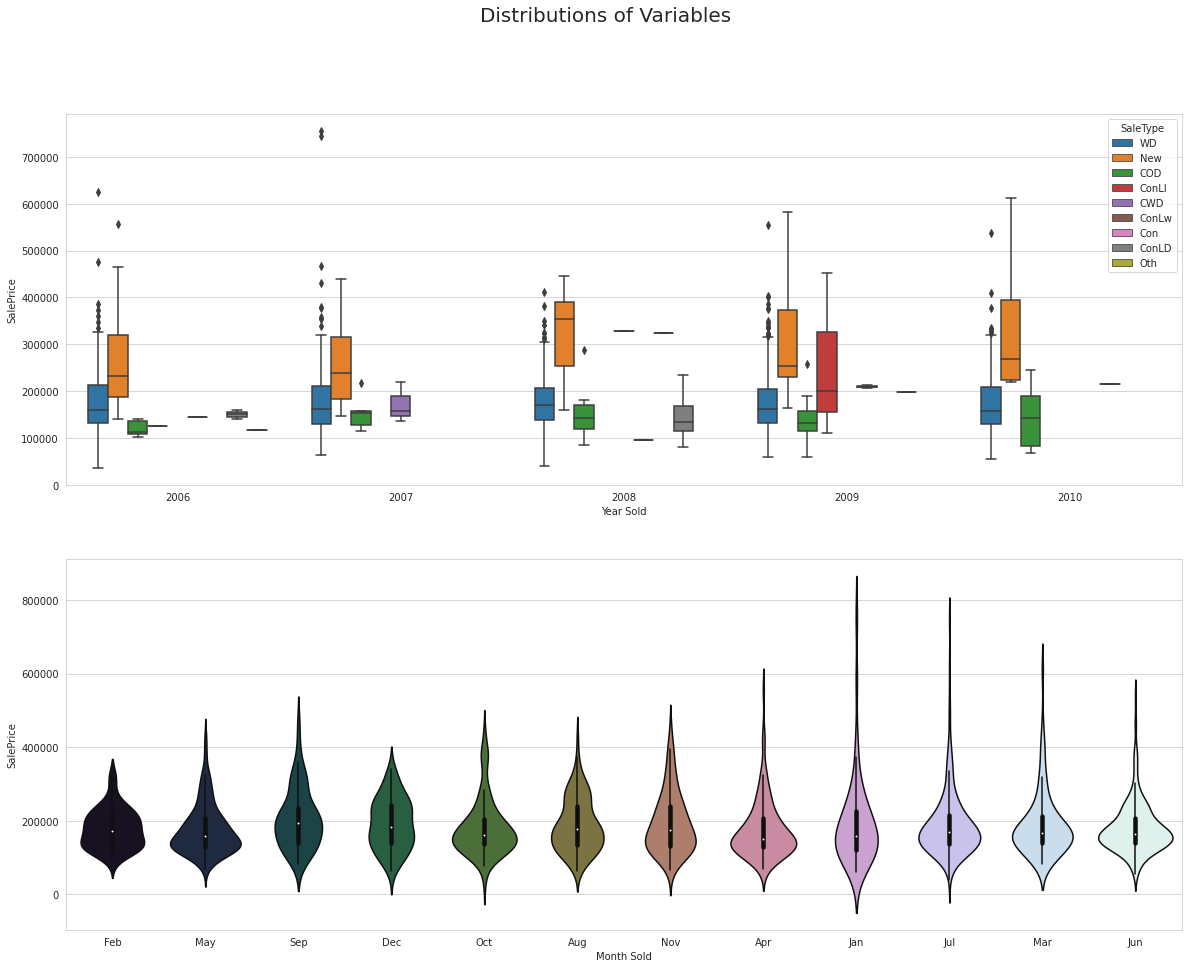

In [30]:

plt.figure(figsize=(20, 15))
plt.subplot(2,1,1)
sns.boxplot(x=tr.YrSold, y=tr.SalePrice, hue=tr.SaleType).set(xlabel='Year Sold')
plt.subplot(2,1,2)
sns.violinplot(x=tr.MoSold, y=tr.SalePrice, palette='cubehelix').set(xlabel='Month Sold')
plt.suptitle('Distributions of Variables',fontsize=20)
plt.show()

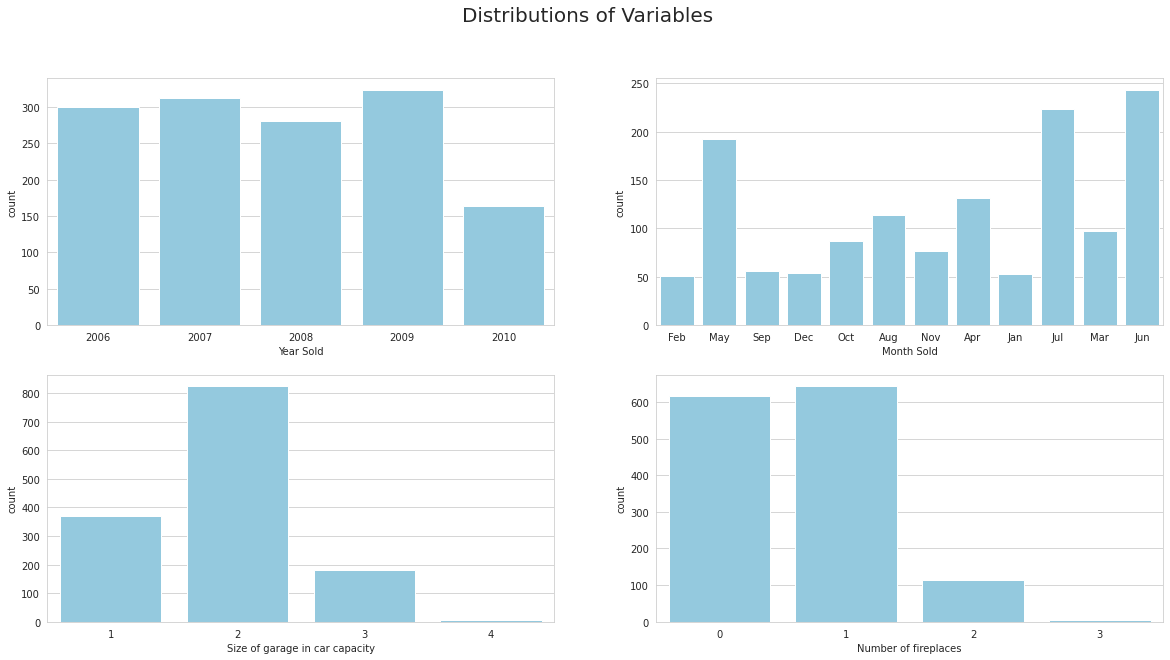

In [31]:

plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.countplot(tr.YrSold, color='skyblue').set(xlabel='Year Sold')
plt.subplot(2,2,2)
sns.countplot(tr.MoSold, color='skyblue').set(xlabel='Month Sold')
plt.subplot(2,2,3)
sns.countplot(tr.GarageCars, color='skyblue').set(xlabel='Size of garage in car capacity')
plt.subplot(2,2,4)
sns.countplot(tr.Fireplaces, color='skyblue').set(xlabel='Number of fireplaces')
plt.suptitle('Distributions of Variables',fontsize=20)
plt.show()

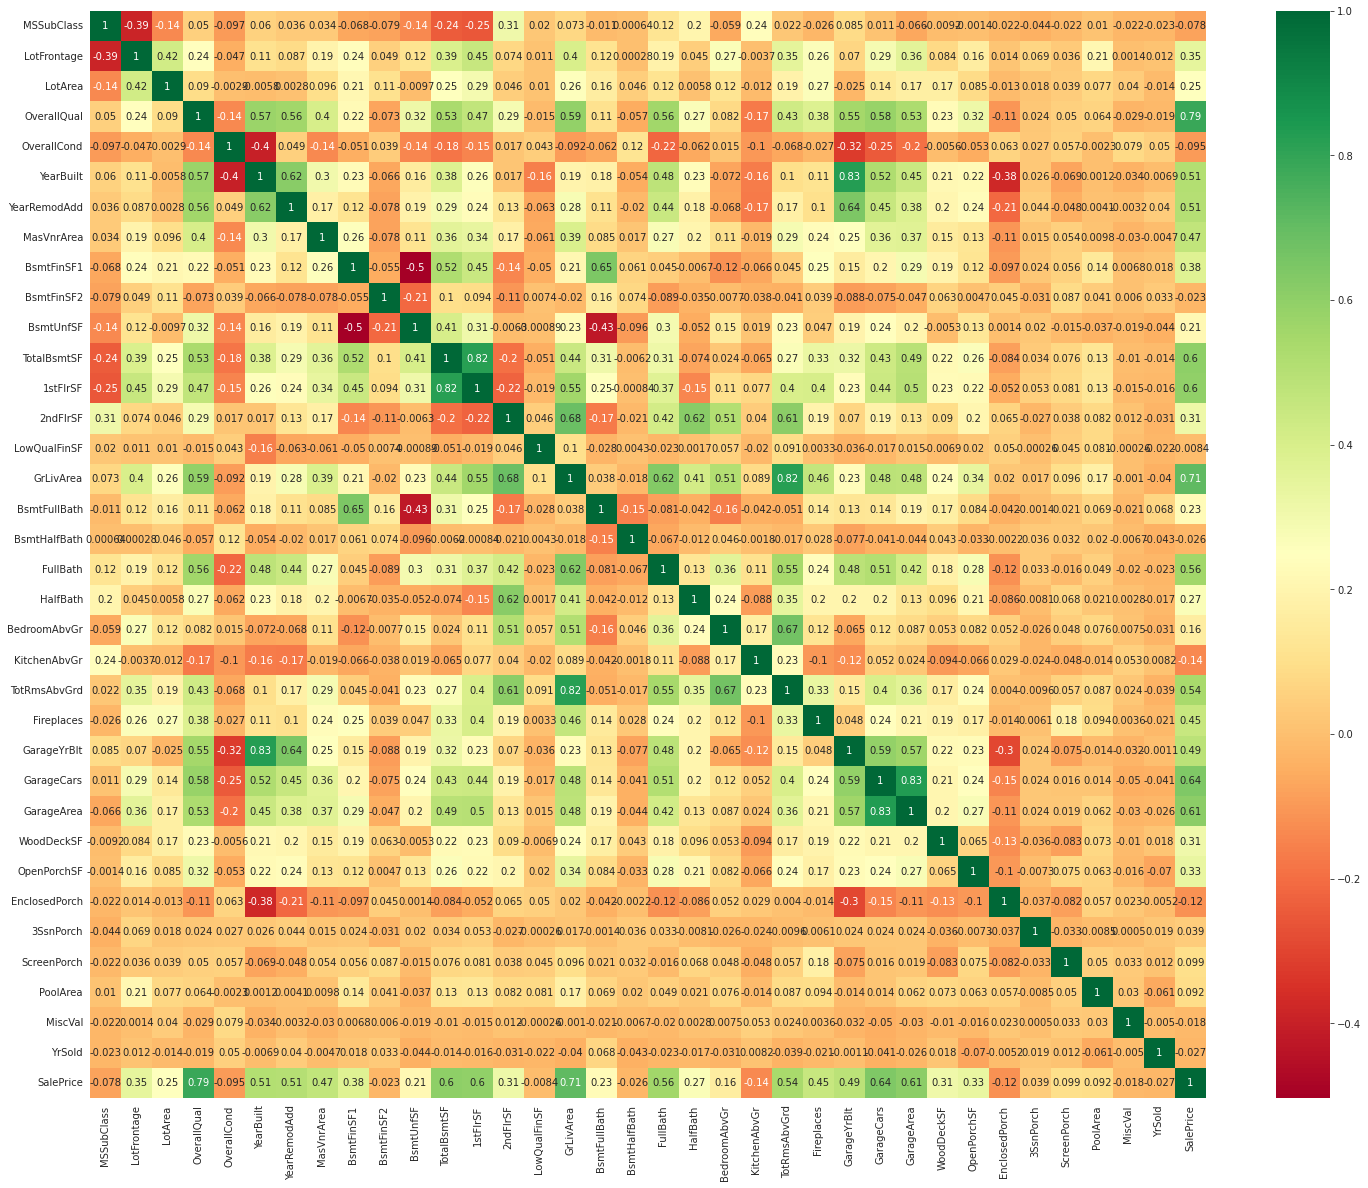

In [32]:
plt.figure(figsize=(25, 20))
sns.heatmap(tr.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [33]:
#dropping some highly correlated variables manually
tr = tr.drop('GarageYrBlt',1)

tr = tr.drop('GarageArea',1)

tr = tr.drop('BsmtUnfSF',1)

tr = tr.drop('1stFlrSF',1)

tr = tr.drop('TotRmsAbvGrd',1)

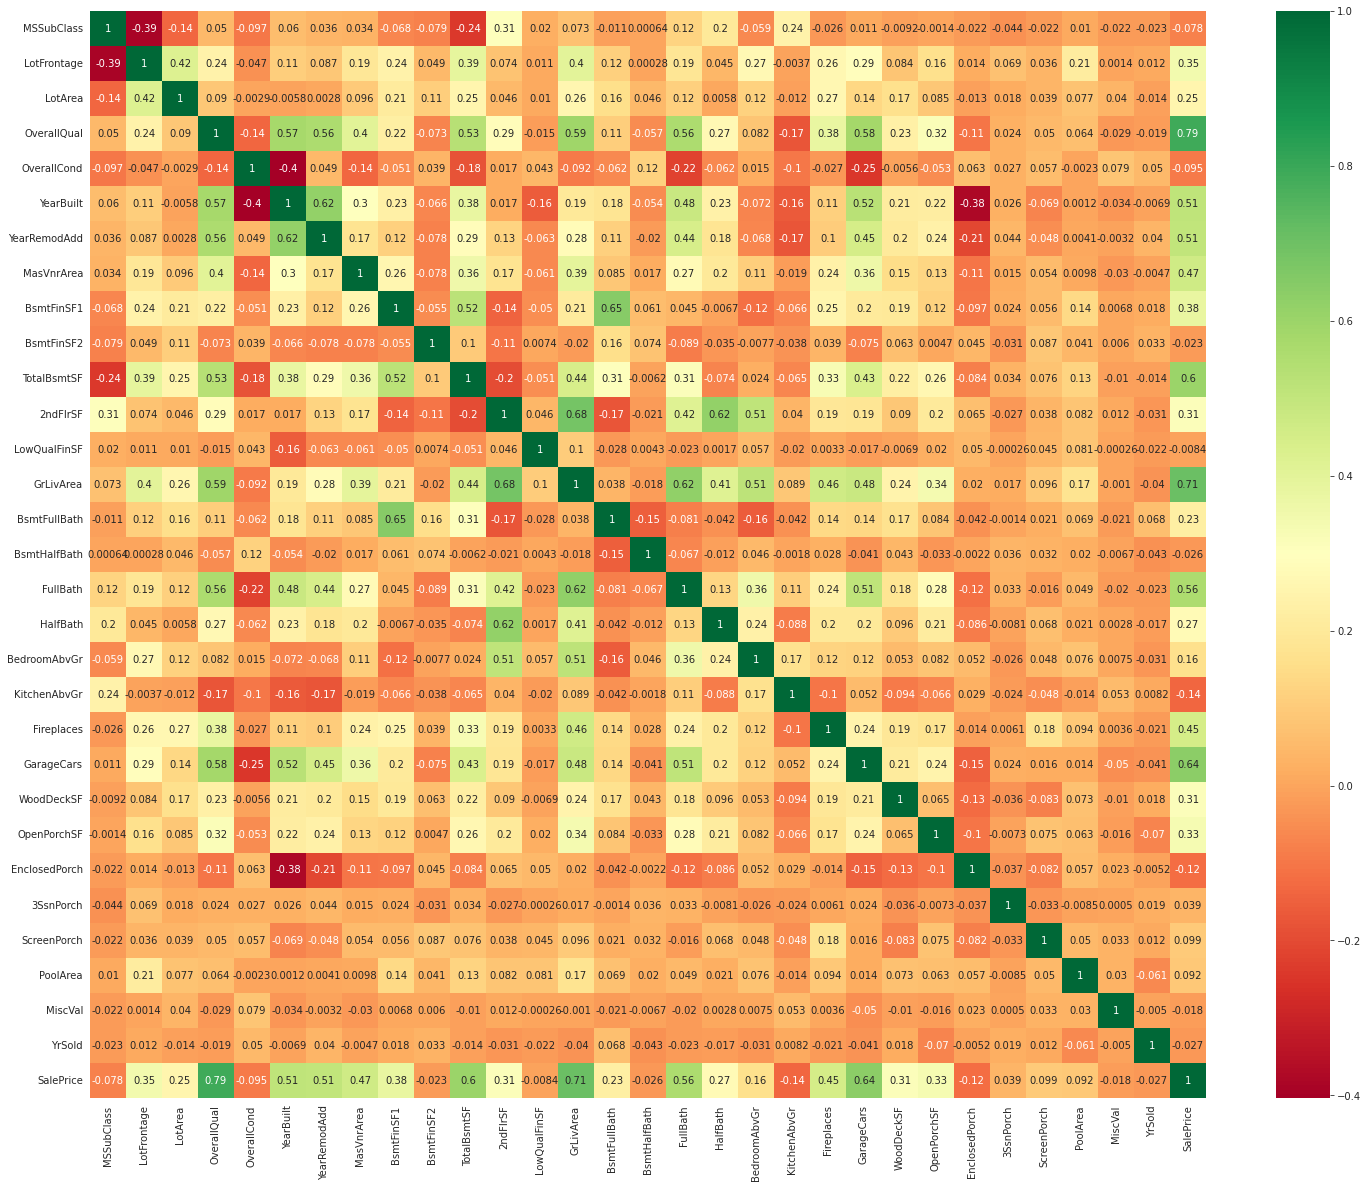

In [34]:
plt.figure(figsize=(25, 20))
sns.heatmap(tr.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [35]:
tr_obj.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,Feb,WD,Normal
1,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,May,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,Sep,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,Feb,WD,Abnorml
4,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,Dec,WD,Normal


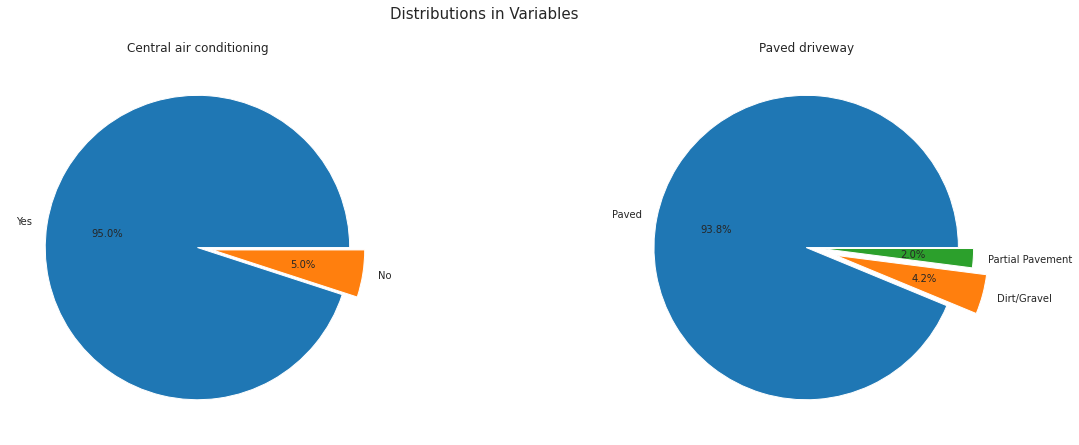

In [36]:

plt.figure(figsize=(20, 7))
plt.subplot(1,2,1)
plt.pie(tr.CentralAir.value_counts(),explode=(0,0.1), labels=['Yes', 'No'],autopct='%1.1f%%')
plt.title('Central air conditioning',fontsize=12)
plt.subplot(1,2,2)
plt.pie(tr.PavedDrive.value_counts(),explode=(0,0.2,0.1), labels=['Paved','Dirt/Gravel','Partial Pavement'],autopct='%1.1f%%')
plt.title('Paved driveway',fontsize=12)
plt.suptitle('Distributions in Variables',fontsize=15)
plt.show()

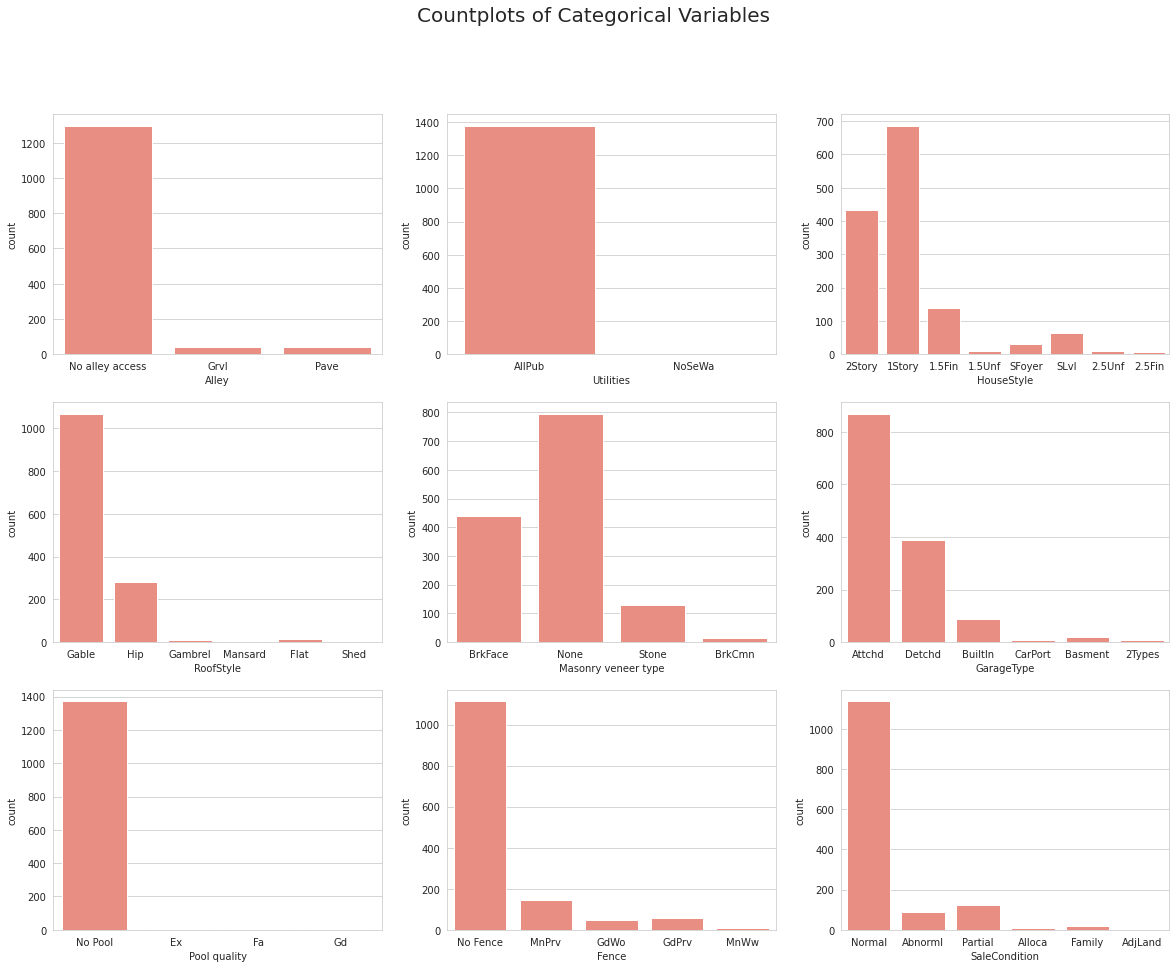

In [37]:
# Countplots of Categorical Variables to see differences

plt.figure(figsize=[20,15])
plt.subplot(3,3,1)
sns.countplot(tr.Alley, color='salmon')
plt.subplot(3,3,2)
sns.countplot(tr.Utilities, color='salmon')
plt.subplot(3,3,3)
sns.countplot(tr.HouseStyle, color='salmon')
plt.subplot(3,3,4)
sns.countplot(tr.RoofStyle, color='salmon')
plt.subplot(3,3,5)
sns.countplot(tr.MasVnrType, color='salmon').set(xlabel='Masonry veneer type')
plt.subplot(3,3,6)
sns.countplot(tr.GarageType, color='salmon')
plt.subplot(3,3,7)
sns.countplot(tr.PoolQC, color='salmon').set(xlabel='Pool quality')
plt.subplot(3,3,8)
sns.countplot(tr.Fence, color='salmon')
plt.subplot(3,3,9)
sns.countplot(tr.SaleCondition, color='salmon')
plt.suptitle('Countplots of Categorical Variables',fontsize=20)
plt.show()

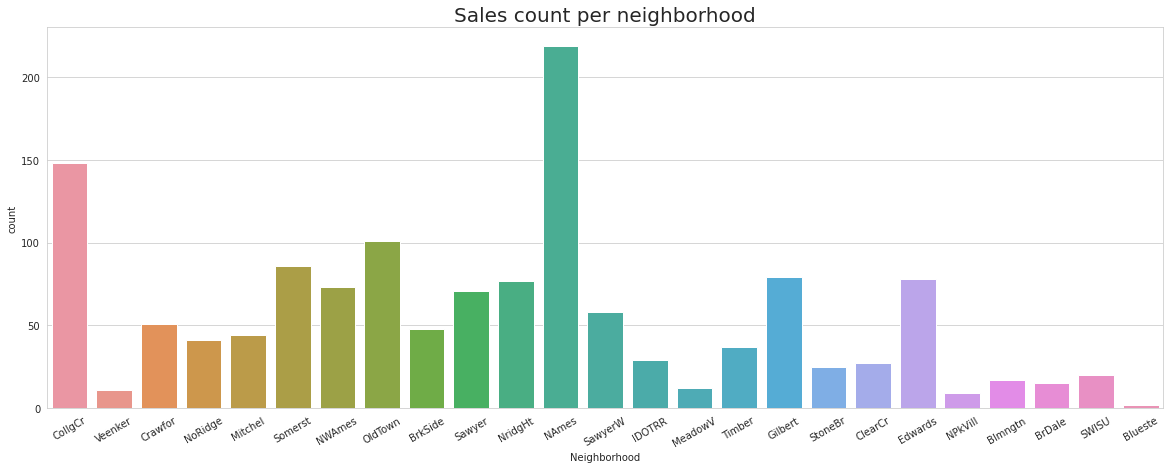

In [38]:

plt.figure(figsize=[20,7])
sns.countplot(tr.Neighborhood)
plt.xticks(rotation=30)
plt.title('Sales count per neighborhood', fontsize=20)
plt.show()

In [39]:
tr.shape, te.shape

((1378, 75), (1459, 80))

In [40]:
i=[]
for col in tr.columns:
    if col not in te.columns:
        i.append(col)
        
print(i)

['SalePrice']


# One-Hot Encoding

In [41]:
dummy_1 = pd.get_dummies(tr[tr_obj.columns], drop_first=True)
dummy_te = pd.get_dummies(te[te_obj.columns])

In [42]:
te = pd.concat([te, dummy_te], axis=1)
te.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_M

In [43]:
tr = pd.concat([tr,dummy_1], axis=1)
tr = tr.drop(tr[tr_obj.columns], 1)
tr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_A

# Train Validation Split on Training Data

In [44]:
X=tr.drop('SalePrice',1)
y=tr.SalePrice

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1033, 258), (345, 258), (1033,), (345,))

In [47]:
# Completing remaining imputations(mathematical) after split
X_train.MasVnrArea = X_train.MasVnrArea.fillna(X_train.MasVnrArea.median())
X_test.MasVnrArea = X_test.MasVnrArea.fillna(X_test.MasVnrArea.median())

X_train.LotFrontage = X_train.LotFrontage.fillna(X_train.LotFrontage.median())
X_test.LotFrontage = X_test.LotFrontage.fillna(X_test.LotFrontage.median())

In [48]:
X_train.isna().sum().any()

False

In [49]:
X_test.isna().sum().any()

False

# PCA

In [50]:
pca = PCA(random_state=0)
pca.fit(X_train)

PCA(random_state=0)

In [51]:
#pca.components_

In [52]:
var_cumu=np.cumsum(pca.explained_variance_ratio_)

In [53]:
# plotting Cumulative Variance Explained By PCA using plotly for interactive graph
px.line(var_cumu, title='Cumulative Variance Explained By PCA')

In [54]:
# not pursuing pca

# Random Forest - Basic Model

In [55]:
rf_basic = RandomForestRegressor(random_state=0, n_jobs=-1, oob_score=True, n_estimators=50)
rf_basic.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [56]:
rf_basic.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, oob_score=True,
                      random_state=0)

In [57]:
#Out of bag score
rf_basic.oob_score_

0.8303895417169971

In [58]:
sample_tree = rf_basic.estimators_[0]

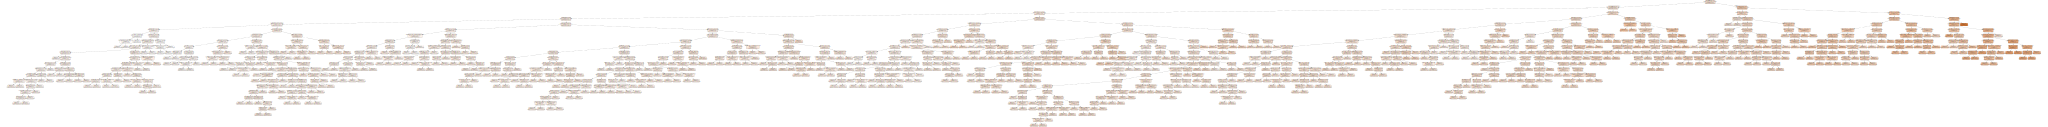

In [59]:
sample_tree_viz = tree.export_graphviz(sample_tree, out_file=None, feature_names=X.columns.values, filled=True, rounded=True)

draw_graph = graphviz.Source(sample_tree_viz, format='png') 
draw_graph

In [60]:
y_train_pred = rf_basic.predict(X_train)
r2_score(y_train, y_train_pred)

0.97640815508036

In [61]:
y_test_pred = rf_basic.predict(X_test)
r2_score(y_test,y_test_pred)

0.8806992614298653

In [62]:
n=len(X_test)
k=len(X_test.columns)
adj_r2_score = 1 - ((1-r2_score(y_test, y_test_pred))*(n-1)/(n-k-1))
print('The adjusted r2 score of y_test, y_pred is:', adj_r2_score)

The adjusted r2 score of y_test, y_pred is: 0.5227970457194613


In [63]:
mean_squared_error(y_test,y_test_pred)

739145524.3007491

# Feature Selection Using RFE

In [64]:
rfe = RFE(estimator=rf_basic, n_features_to_select=20)

rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(n_estimators=50, n_jobs=-1, oob_score=True,
                                    random_state=0),
    n_features_to_select=20)

In [65]:
rfe.ranking_

array([  2,   1,   1,   1,   1,   1,   1,   1,   1,  34,   1,   1, 125,
         1,  16, 111,   1,  19,   1,  13,   3,   1,   1,   1,  22,  62,
         6,  82, 117,   4, 114, 173,  18,   5, 150, 153, 139, 119, 159,
        11, 131,  95,  60, 231,  32, 113, 226,  31,  43, 151, 230, 198,
       140, 157,  35,  14,  79,  94, 106, 167, 141,  96, 186,  93, 118,
        12,  38, 146, 126, 130,  47,  58,  48, 172,  81,  68, 194, 127,
       105, 149, 207, 195, 193, 164, 227, 232, 228, 212, 223, 161, 148,
       152, 100, 180,  71, 175, 191,  76, 160, 128,  39, 171,  25, 185,
       209, 166, 238, 200, 210, 199, 225, 208, 216,  33, 236, 116,  74,
       220,  80,  88, 234,  52,  44,  54, 178, 233, 147, 144, 239,  99,
        84, 165, 110, 174,  70, 205, 136,   8,  91, 142,  26,  73,  15,
       133,   1,  53,  64,  41,  72,  61,  78, 123, 197, 224, 137,   1,
       182,  56, 112, 177, 218,  57,  20,  86,   7, 192,  89,  23,  83,
       183, 101,  67, 102, 201, 122, 170, 145, 107, 129, 179, 22

In [66]:
X_train.columns[rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'ExterQual_Gd', 'BsmtQual_Gd', 'KitchenQual_Gd',
       'GarageFinish_Unf'],
      dtype='object')

In [67]:
X_train2 = X_train.loc[:,rfe.support_]
X_train2.shape

(1033, 20)

In [68]:
X_test2 = X_test.loc[:,rfe.support_]
X_test2.shape

(345, 20)

In [69]:
rf=RandomForestRegressor(n_jobs=-1, random_state=0, oob_score=True)

rf.fit(X_train2,y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=0)

In [70]:
rf.oob_score_

0.8406073279481919

In [71]:
y_train_pred2 = rf.predict(X_train2)

r2_score(y_train,y_train_pred2)

0.9766356499858725

In [72]:
y_test_pred2 = rf.predict(X_test2)

In [73]:
n=len(X_test)
k=len(X_test.columns)
adj_r2_score = 1 - ((1-r2_score(y_test, y_test_pred2))*(n-1)/(n-k-1))
print('The adjusted r2 score of y_test, y_pred is:', adj_r2_score)

The adjusted r2 score of y_test, y_pred is: 0.5390951443285563


# Random Forest Model with GridSearchCV and Hyperparameter tuning

In [74]:
# Setting hyperparams
params = {'max_depth': [5,10,15],
         'max_features': [5,10,15],
         'min_samples_leaf': [5,10,20,50],
         'n_estimators': [25,50,100,150]}

In [75]:
# model building with 5-fold cv
model_cv = GridSearchCV(estimator=rf, 
                        param_grid=params,
                       verbose=1,
                       n_jobs=-1,
                       return_train_score=True,
                       cv=5)

In [76]:
model_cv.fit(X_train2,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.0min finished


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': [5, 10, 15],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [25, 50, 100, 150]},
             return_train_score=True, verbose=1)

In [77]:
model_cv.best_estimator_

RandomForestRegressor(max_depth=15, max_features=10, min_samples_leaf=5,
                      n_estimators=150, n_jobs=-1, oob_score=True,
                      random_state=0)

In [78]:
model_cv.best_score_

0.8345997710815896

In [79]:
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.152421,0.016161,0.105617,0.000752,5,5,5,25,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.798057,0.792307,0.827719,0.810191,0.811752,0.808005,0.012271,58,0.867655,0.864292,0.861852,0.864321,0.869890,0.865602,0.002829
1,0.281542,0.007317,0.105690,0.000838,5,5,5,50,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.782635,0.795099,0.837122,0.819439,0.805871,0.808033,0.018938,57,0.873328,0.869088,0.865756,0.868792,0.870079,0.869409,0.002435
2,0.472348,0.013651,0.110681,0.007301,5,5,5,100,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.785658,0.802768,0.840158,0.821302,0.812539,0.812485,0.018208,49,0.876346,0.872699,0.867182,0.870797,0.872661,0.871937,0.002982
3,0.720766,0.054211,0.107966,0.004260,5,5,5,150,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.796430,0.800725,0.837648,0.819433,0.809204,0.812688,0.014752,48,0.876912,0.874078,0.867698,0.870017,0.871670,0.872075,0.003193
4,0.149308,0.006512,0.106380,0.000818,5,5,10,25,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.794879,0.808918,0.807648,0.786202,0.775589,0.794647,0.012707,82,0.844848,0.839077,0.835484,0.840951,0.838730,0.839818,0.003069


In [80]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
115,0.883277,0.049340,0.106041,0.001003,15,10,5,150,"{'max_depth': 15, 'max_features': 10, 'min_sam...",0.801717,0.822551,0.875236,0.842102,0.831393,0.834600,0.024267,1,0.918340,0.921117,0.909279,0.913040,0.912232,0.914802,0.004304
66,0.602877,0.025377,0.108576,0.001632,10,10,5,100,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.805529,0.817037,0.873604,0.842011,0.830477,0.833732,0.023422,2,0.918024,0.922093,0.906704,0.914613,0.912100,0.914707,0.005223
114,0.593897,0.006956,0.108416,0.005057,15,10,5,100,"{'max_depth': 15, 'max_features': 10, 'min_sam...",0.797577,0.819262,0.875864,0.842818,0.832849,0.833674,0.025981,3,0.919749,0.920280,0.908040,0.913438,0.912381,0.914778,0.004646
67,0.894831,0.055059,0.111715,0.005664,10,10,5,150,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.803711,0.818522,0.874894,0.841935,0.828498,0.833512,0.024172,4,0.916849,0.921228,0.908565,0.914534,0.911999,0.914635,0.004293
99,0.769723,0.030079,0.106343,0.001378,15,5,5,150,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.813489,0.826577,0.858912,0.835763,0.823039,0.831556,0.015426,5,0.902847,0.904553,0.895222,0.899124,0.899304,0.900210,0.003246


# Random Forest Model 2 with modified hyperparameters

In [81]:
# Modifying hyperparams as per performance in previous model
params = {'max_depth': [10,12,15],
         'max_features': [8,10,12],
         'min_samples_leaf': [10,12,15],
         'n_estimators': [100,150,200]}

In [82]:
model_cv2 = GridSearchCV(estimator=rf,
                        param_grid=params,
                        verbose=1,
                        n_jobs=-1,
                        return_train_score=True,
                        cv=4)
model_cv2.fit(X_train2,y_train)

Fitting 4 folds for each of 81 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.4min finished


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12, 15], 'max_features': [8, 10, 12],
                         'min_samples_leaf': [10, 12, 15],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, verbose=1)

In [83]:
model_cv2.best_estimator_

RandomForestRegressor(max_depth=12, max_features=8, min_samples_leaf=10,
                      n_jobs=-1, oob_score=True, random_state=0)

In [84]:
model_cv2.best_score_

0.8171860542217642

In [85]:
cv_df2 = pd.DataFrame(model_cv2.cv_results_)
cv_df2.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
27,0.657900,0.047205,0.119797,0.019326,12,8,10,100,"{'max_depth': 12, 'max_features': 8, 'min_samp...",0.830105,0.820800,0.808704,0.809135,0.817186,0.008899,1,0.869838,0.872948,0.868258,0.867833,0.869719,0.002008
54,0.540401,0.052060,0.108862,0.003029,15,8,10,100,"{'max_depth': 15, 'max_features': 8, 'min_samp...",0.830105,0.820800,0.808704,0.809135,0.817186,0.008899,1,0.869838,0.872948,0.868258,0.867833,0.869719,0.002008
0,0.575129,0.010735,0.106281,0.001229,10,8,10,100,"{'max_depth': 10, 'max_features': 8, 'min_samp...",0.828776,0.820468,0.809002,0.809879,0.817031,0.008145,3,0.870278,0.872546,0.868325,0.867791,0.869735,0.001868
63,0.580072,0.008808,0.105197,0.000338,15,10,10,100,"{'max_depth': 15, 'max_features': 10, 'min_sam...",0.818067,0.821676,0.816169,0.807675,0.815897,0.005143,4,0.877534,0.875793,0.873641,0.872870,0.874960,0.001832
36,0.580640,0.023145,0.109031,0.004698,12,10,10,100,"{'max_depth': 12, 'max_features': 10, 'min_sam...",0.818067,0.821676,0.816169,0.807675,0.815897,0.005143,4,0.877534,0.875793,0.873641,0.872870,0.874960,0.001832


In [86]:
model_cv2.best_params_

{'max_depth': 12,
 'max_features': 8,
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [87]:
final_rf = RandomForestRegressor(random_state=0,max_depth=8,max_features=10,min_samples_leaf=12,n_estimators=75,n_jobs=-1)

final_rf.fit(X_train2,y_train)

RandomForestRegressor(max_depth=8, max_features=10, min_samples_leaf=12,
                      n_estimators=75, n_jobs=-1, random_state=0)

In [88]:
final_rf_pred= final_rf.predict(X_test2)
mean_squared_error(y_test,final_rf_pred)

979494505.9378259

# XGBoost Model

In [89]:
xgb_r = XGBRegressor(random_state=0, learning_rate=0.1,n_estimators=1000)

xgb_r.fit(X_train2,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [90]:
preds1_xgb = xgb_r.predict(X_test2)

In [91]:
mse1 = mean_squared_error(y_test,preds1_xgb)
mse1

688344126.164981

## The XGBoost model gives better performance so we will do final prediction with it

In [92]:
te_final = te[X_train2.columns]

In [93]:
te_final.shape

(1459, 20)

In [94]:
test_predictions = xgb_r.predict(te_final)

In [95]:
test_predictions

array([127017.516, 158836.44 , 195189.25 , ..., 166452.4  , 128593.73 ,
       219960.16 ], dtype=float32)

In [96]:
submission = pd.DataFrame({'Id':te['Id'],'SalePrice':test_predictions})
submission.head()

,Id,SalePrice
0,1461,127017.515625
1,1462,158836.437500
2,1463,195189.250000
3,1464,182927.984375
4,1465,191694.281250


In [97]:
submission.SalePrice.mean()

178965.859375

In [98]:
filename='house_price_pred_competition_xgb.csv'
submission.to_csv(filename,index=False)